In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout


In [8]:
train=pd.read_csv('sign_mnist_train.csv')
test=pd.read_csv('sign_mnist_test.csv')

In [14]:
train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93


In [10]:
train_data=np.array(train,dtype='float32')
test_data=np.array(test,dtype='float32')

In [11]:
train_data

array([[  3., 107., 118., ..., 204., 203., 202.],
       [  6., 155., 157., ..., 103., 135., 149.],
       [  2., 187., 188., ..., 195., 194., 195.],
       ...,
       [ 18., 174., 174., ..., 202., 200., 200.],
       [ 17., 177., 181., ...,  64.,  87.,  93.],
       [ 23., 179., 180., ..., 205., 209., 215.]], dtype=float32)

In [12]:
test_data

array([[  6., 149., 149., ..., 112., 120., 107.],
       [  5., 126., 128., ..., 184., 182., 180.],
       [ 10.,  85.,  88., ..., 225., 224., 222.],
       ...,
       [  2., 190., 191., ..., 211., 209., 208.],
       [  4., 201., 205., ...,  67.,  70.,  63.],
       [  2., 173., 174., ..., 195., 193., 192.]], dtype=float32)

In [15]:
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 
               'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]

Label for the image is:  F


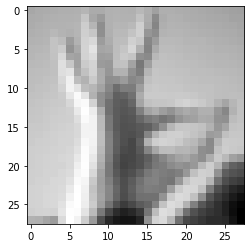

In [19]:
plt.imshow(train_data[919,1:].reshape((28,28)), cmap='gray') 
print("Label for the image is: ", class_names[int(train_data[919,0])])


Text(0.5, 1.0, 'Label')

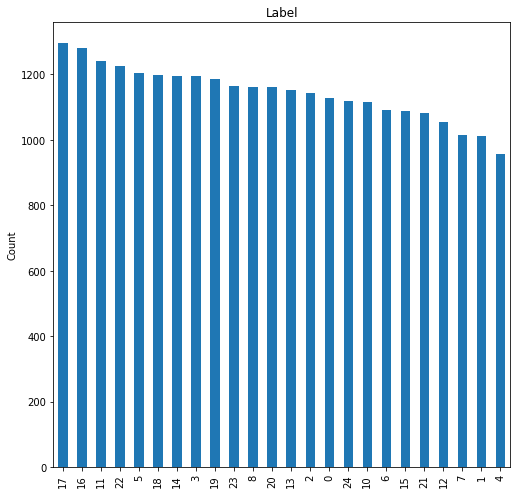

In [20]:
# Data distribution visualization
fig = plt.figure(figsize=(18,18))
ax1 = fig.add_subplot(221)
train['label'].value_counts().plot(kind='bar', ax=ax1)
ax1.set_ylabel('Count')
ax1.set_title('Label')

In [22]:
x_train=train_data[:,1:]/255
x_test=test_data[:,1:]/255

In [23]:
x_train

array([[0.41960785, 0.4627451 , 0.49803922, ..., 0.8       , 0.79607844,
        0.7921569 ],
       [0.60784316, 0.6156863 , 0.6117647 , ..., 0.40392157, 0.5294118 ,
        0.58431375],
       [0.73333335, 0.7372549 , 0.7372549 , ..., 0.7647059 , 0.7607843 ,
        0.7647059 ],
       ...,
       [0.68235296, 0.68235296, 0.68235296, ..., 0.7921569 , 0.78431374,
        0.78431374],
       [0.69411767, 0.70980394, 0.72156864, ..., 0.2509804 , 0.34117648,
        0.3647059 ],
       [0.7019608 , 0.7058824 , 0.7058824 , ..., 0.8039216 , 0.81960785,
        0.84313726]], dtype=float32)

In [29]:
y_train=train_data[:,0]
y_train_cat= to_categorical(y_train, num_classes=25)

In [30]:
y_test=test_data[:,0]
y_test_cat= to_categorical(y_test, num_classes=25)

In [31]:
y_test

array([ 6.,  5., 10., ...,  2.,  4.,  2.], dtype=float32)

In [32]:
y_test_cat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [34]:
#Reshape for the neural network
x_train = x_train.reshape(x_train.shape[0], *(28, 28, 1))
x_test = x_test.reshape(x_test.shape[0], *(28, 28, 1))

In [ ]:
#models

model=sequential()

model.add(conv2D(32,(3,3),input_shape(28,28,1),activation='relu')
model.add( MaxPooling2D(2,2))
model.add(Dropout(0.2)

In [47]:
model=Sequential()

model.add(Conv2D(32,(3,3),input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))


model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(25,activation='softmax'))


In [48]:
#model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam', metrics =['acc'])
model.compile(loss ='categorical_crossentropy', optimizer='adam', metrics =['acc'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 128)        

In [50]:
history = model.fit(x_train, y_train_cat, batch_size = 128, epochs = 10, verbose = 1, validation_data = (x_test, y_test_cat))


Epoch 1/10
215/215 [==============================] - 15s 24ms/step - loss: 3.0320 - acc: 0.0879 - val_loss: 1.7383 - val_acc: 0.4428
Epoch 2/10
215/215 [==============================] - 4s 20ms/step - loss: 1.4035 - acc: 0.5250 - val_loss: 0.7542 - val_acc: 0.7249
Epoch 3/10
215/215 [==============================] - 4s 20ms/step - loss: 0.7465 - acc: 0.7458 - val_loss: 0.5099 - val_acc: 0.8176
Epoch 4/10
215/215 [==============================] - 4s 20ms/step - loss: 0.4799 - acc: 0.8366 - val_loss: 0.3945 - val_acc: 0.8606
Epoch 5/10
215/215 [==============================] - 4s 20ms/step - loss: 0.3372 - acc: 0.8855 - val_loss: 0.3737 - val_acc: 0.8487
Epoch 6/10
215/215 [==============================] - 4s 21ms/step - loss: 0.2561 - acc: 0.9125 - val_loss: 0.2839 - val_acc: 0.8894
Epoch 7/10
215/215 [==============================] - 4s 20ms/step - loss: 0.1833 - acc: 0.9389 - val_loss: 0.2651 - val_acc: 0.9032
Epoch 8/10
215/215 [==============================] - 4s 20ms/step -

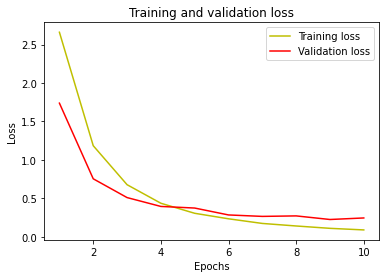

In [52]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

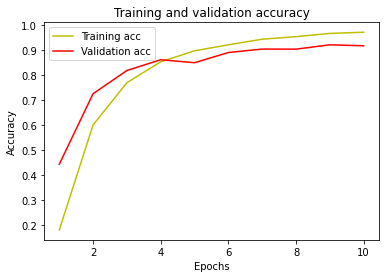

In [53]:
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [55]:

prediction = model.predict_classes(x_test)

C:\Users\Anjan Bharadwaj\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [56]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, prediction)
print('Accuracy Score = ', accuracy)

Accuracy Score =  0.9163413273842722


Predicted Label:  N
True Label:  N


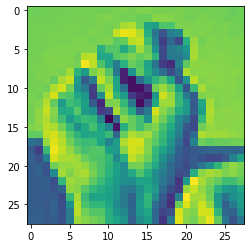

In [59]:
import random
i = random.randint(1,len(prediction))
plt.imshow(x_test[i,:,:,0]) 
print("Predicted Label: ", class_names[int(prediction[i])])
print("True Label: ", class_names[int(y_test[i])])